<a href="https://colab.research.google.com/github/Merlinm97/Zara-Fashion-Prediction/blob/main/Zara_Fashions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

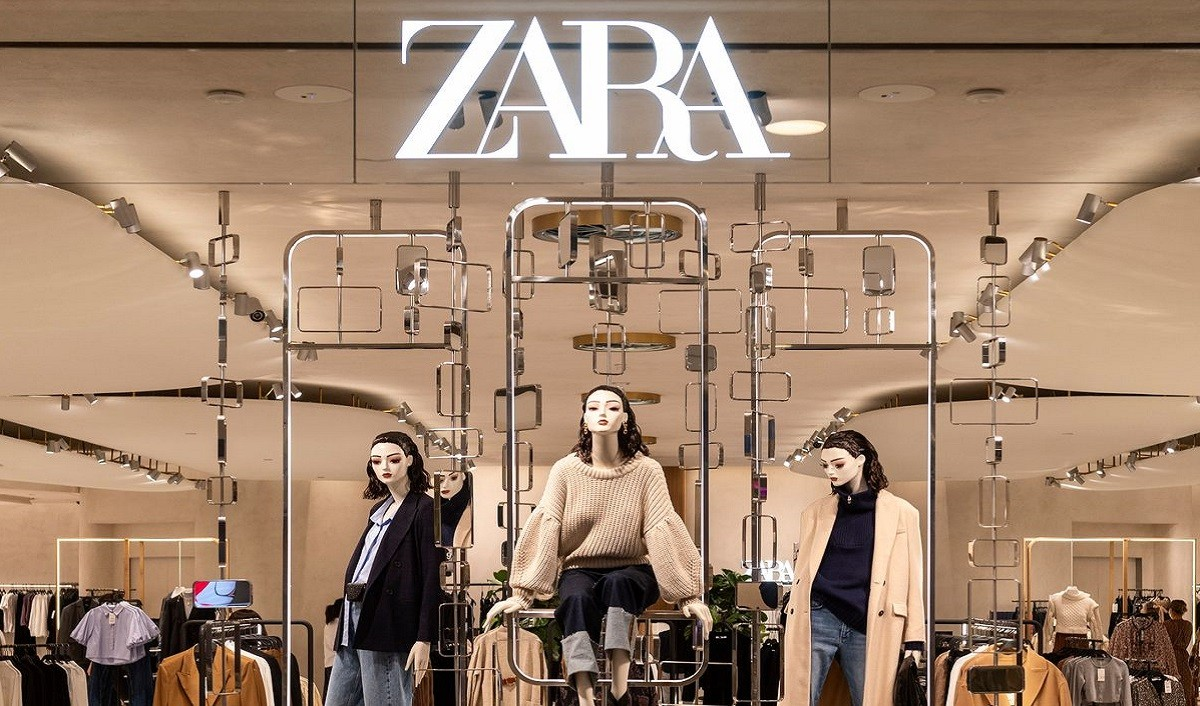

## Data Collection

In [1]:
!kaggle datasets download -d abhinavtyagi2708/zara-dataset-men-and-women-clothing

Dataset URL: https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing
License(s): other
  0% 0.00/374k [00:00<?, ?B/s]
100% 374k/374k [00:00<00:00, 115MB/s]


In [2]:
!unzip /content/zara-dataset-men-and-women-clothing.zip

Archive:  /content/zara-dataset-men-and-women-clothing.zip
  inflating: Men/Men/ACCESSORIES.csv  
  inflating: Men/Men/BAGS_BACKPACKS.csv  
  inflating: Men/Men/BEAUTY.csv      
  inflating: Men/Men/BLAZERS.csv     
  inflating: Men/Men/HOODIES_SWEATSHIRTS.csv  
  inflating: Men/Men/JACKETS.csv     
  inflating: Men/Men/JEANS.csv       
  inflating: Men/Men/LINEN.csv       
  inflating: Men/Men/OVERSHIRTS.csv  
  inflating: Men/Men/PERFUMES.csv    
  inflating: Men/Men/POLO SHIRTS.csv  
  inflating: Men/Men/SHIRTS.csv      
  inflating: Men/Men/SHOES.csv       
  inflating: Men/Men/SHORTS.csv      
  inflating: Men/Men/SUITS.csv       
  inflating: Men/Men/SWEATERS_CARDIGANS.csv  
  inflating: Men/Men/SWIMWEAR.csv    
  inflating: Men/Men/T-SHIRTS.csv    
  inflating: Men/Men/TROUSERS.csv    
  inflating: Men/Men/ZARA ATHLETICZ.csv  
  inflating: Men/Men/ZARA ORIGINS.csv  
  inflating: Women/Women/ACCESSORIES_JEWELLERY.csv  
  inflating: Women/Women/BAGS.csv    
  inflating: Women/Wome

The Zara Clothing Collection dataset is a comprehensive collection of fashion items scraped from the renowned clothing brand Zara. This dataset focuses on both men's and women's clothing and is meticulously classified into various categories such as shirts, pants, trousers, shorts, and more.


Dataset Contents:

Product Name: Each record in the dataset includes the name of the fashion item.

Description: This field contains a more detailed textual description of the clothing item.

Images: The dataset includes links or references to images of the Zara clothing items.

Price: The price of each clothing item is recorded in this field.

Gender: Which refers Men or Women

# Importing Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Explore and Understand the Data (EDA) & Data Preprocessing

In [4]:
# Define the directories for men and women
men_folder = '/content/Men/Men'
women_folder = '/content/Women/Women'

# Get list of all CSV files in both directories
men_files = [f for f in os.listdir(men_folder) if f.endswith('.csv')]
women_files = [f for f in os.listdir(women_folder) if f.endswith('.csv')]

# Function to load CSV files into a list of DataFrames
def load_csv_files(file_list, folder):
    data_frames = []
    for file in file_list:
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path)
        data_frames.append(df)
    return data_frames

# Load CSVs for both men and women
men_data = load_csv_files(men_files, men_folder)
women_data = load_csv_files(women_files, women_folder)

# Combine all data into one DataFrame
men_df = pd.concat(men_data, ignore_index=True)
women_df = pd.concat(women_data, ignore_index=True)

# Optionally, add a 'gender' column to differentiate between men and women data
men_df['gender'] = 'Men'
women_df['gender'] = 'Women'

# Combine both data into one DataFrame
df = pd.concat([men_df, women_df], ignore_index=True)


In [5]:
df.tail(5)

,Unnamed: 0,product_name,link,product_images,price,details,gender,Product_Name,Link,Product_Image,Price,Details
4180,119,NaN,NaN,NaN,NaN,NaN,Women,HALTER TOP WITH POCKETS,https://www.zara.com/in/en/halter-top-with-poc...,[],"₹ 2,990.00","Halterneck top featuring front patch pockets, ..."
4181,120,NaN,NaN,NaN,NaN,NaN,Women,CROP TOP WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/crop-top-with-cutwo...,[],"₹ 2,990.00",Crop top with a straight neck and wide straps....
4182,121,NaN,NaN,NaN,NaN,NaN,Women,TIE-DYE PRINT CROP TOP,https://www.zara.com/in/en/tie-dye-print-crop-...,[],"₹ 2,990.00",Top with a surplice neckline and long sleeves....
4183,122,NaN,NaN,NaN,NaN,NaN,Women,RUFFLED LINEN TOP,https://www.zara.com/in/en/ruffled-linen-top-p...,[],"₹ 2,990.00",Sleeveless top made of 100% linen. Featuring a...
4184,123,NaN,NaN,NaN,NaN,NaN,Women,JACQUARD FRILLED TOP,https://www.zara.com/in/en/jacquard-frilled-to...,[],"₹ 2,990.00",Top with a V-neck and thin straps. Ruffle trim...


In [6]:
df.head(5)

,Unnamed: 0,product_name,link,product_images,price,details,gender,Product_Name,Link,Product_Image,Price,Details
0,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of poplin fabri...,Men,NaN,NaN,NaN,NaN,NaN
1,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of cotton popli...,Men,NaN,NaN,NaN,NaN,NaN
2,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of short boxers made of cotton...,Men,NaN,NaN,NaN,NaN,NaN
3,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 2,590.00",Pack of 2 pairs of boxers made of poplin. Elas...,Men,NaN,NaN,NaN,NaN,NaN
4,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 3 pairs of boxers with an elastic wais...,Men,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(4185, 12)

In [8]:
df.columns

Index(['Unnamed: 0', 'product_name', 'link', ' product_images', 'price',
       'details', 'gender', 'Product_Name', 'Link', 'Product_Image', 'Price',
       'Details'],
      dtype='object')

In [9]:
df.isna().sum()

,0
Unnamed: 0,0
product_name,2709
link,2707
product_images,2707
price,2709
details,2710
gender,0
Product_Name,1481
Link,1478
Product_Image,1478


In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Create a dictionary for renaming the columns to be consistent
column_rename_dict = {
    'Unnamed: 0': 'index',
    'product_name': 'product_name',
    'link': 'link',
    ' product_images': 'product_images',
    'price': 'price',
    'details': 'details',
    'gender': 'gender',
    'Product_Name': 'product_name',
    'Link': 'link',
    'Product_Image': 'product_images',
    'Price': 'price',
    'Details': 'details'
}

# Rename the columns in both men and women DataFrames
men_df.rename(columns=column_rename_dict, inplace=True)
women_df.rename(columns=column_rename_dict, inplace=True)

# Combine the cleaned DataFrames
df = pd.concat([men_df, women_df], ignore_index=True)

# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Check the cleaned columns
print(df.columns)


Index(['index', 'product_name', 'link', 'product_images', 'price', 'details',
       'gender'],
      dtype='object')


In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4179 entries, 0 to 4184
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4179 non-null   int64 
 1   product_name    4179 non-null   object
 2   link            4179 non-null   object
 3   product_images  4179 non-null   object
 4   price           4179 non-null   object
 5   details         4179 non-null   object
 6   gender          4179 non-null   object
dtypes: int64(1), object(6)
memory usage: 261.2+ KB


In [15]:
df.describe()

,index
count,4179.000000
mean,169.121799
std,164.767990
min,0.000000
25%,46.000000
50%,112.000000
75%,247.000000
max,802.000000


In [16]:
df.price.unique()

array(['₹ 1,990.00', '₹ 2,590.00', '₹ 2,990.00', '₹ 2,890.00', '₹ 990.00',
       '₹ 1,590.00', '₹ 690.00', '₹ 4,990.00', '₹ 2,290.00', '₹ 1,890.00',
       '₹ 3,290.00', '₹ 5,990.00', '₹ 3,990.00', '₹ 5,590.00',
       '₹ 7,590.00', '₹ 11,990.00', '₹ 7,990.00', '₹ 6,990.00',
       '₹ 9,590.00', '₹ 4,590.00', '₹ 8,590.00', '₹ 10,990.00',
       '₹ 1,490.00', '₹ 3,590.00', '₹ 1,790.00', '₹ 17,990.00',
       '₹ 13,990.00', '₹ 890.00', '₹ 15,990.00', '₹ 18,990.00',
       '₹ 2,790.00', '₹ 2,490.00', '₹ 1,290.00', '₹ 590.00', '₹ 1,190.00',
       '₹ 790.00', '₹ 950.00', '₹ 490.00', '₹ 8,990.00', '₹ 16,990.00',
       '₹ 12,990.00', 'Not Found', '₹ 9,990.00', '₹ 1,090.00', '₹ 390.00',
       '₹ 4,490.00'], dtype=object)

In [17]:
# Step 1: Remove ₹ symbol and commas, replace 'Not Found' with NaN
df['price'] = df['price'].replace({'₹': '', ',': '', 'Not Found': None}, regex=True)

# Step 2: Convert to numeric (float), invalid parsing will be converted to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Step 3: Optionally, convert to integer (if no decimals are needed)
df['price'] = df['price'].astype(float)

# Step 4: Handle NaN values (fill with 0 or drop)
df['price'] = df['price'].fillna(0)

# Check the result
print(df['price'].head())

0    1990.0
1    1990.0
2    1990.0
3    2590.0
4    1990.0
Name: price, dtype: float64


In [18]:
df.duplicated().sum()

3

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
# Drop unnecessary columns
df.drop(columns=['index'], inplace=True)

In [21]:
from google.colab import files

# Save your DataFrame as a CSV file
df.to_csv('dataset.csv', index=False)

# Download the CSV file
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

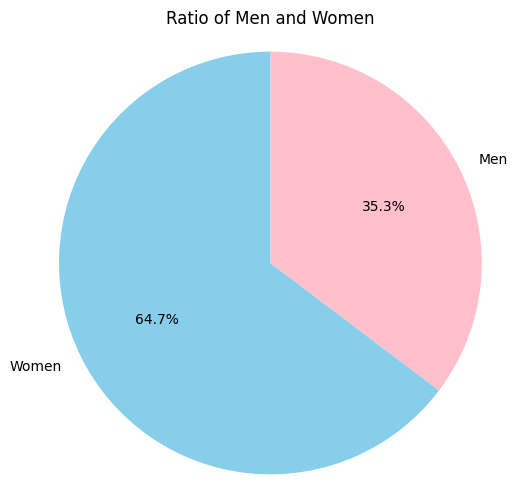

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'pink']
)
plt.title('Ratio of Men and Women')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


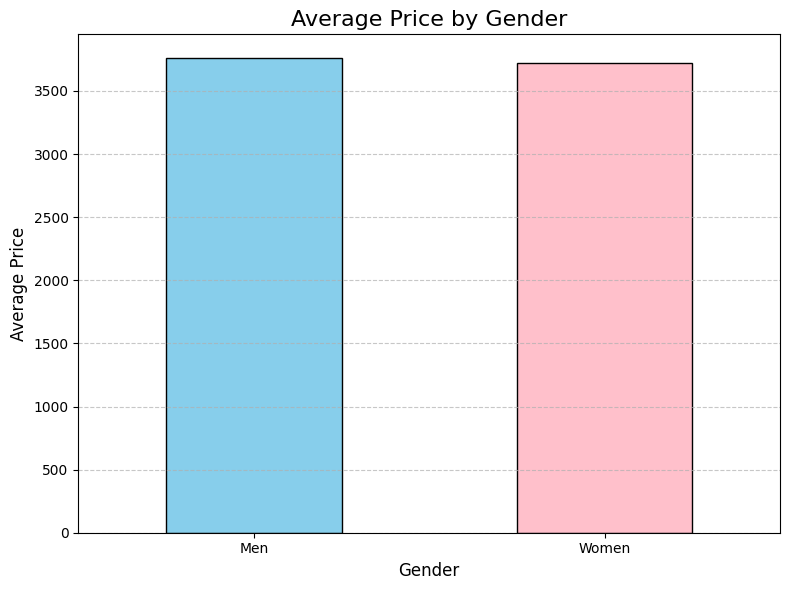

In [23]:
# Group by gender and calculate the average price
average_price_by_gender = df.groupby('gender')['price'].mean()

# Plot bar chart
plt.figure(figsize=(8, 6))
average_price_by_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')

# Customize the chart
plt.title('Average Price by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


In [24]:
df.dtypes

,0
product_name,object
link,object
product_images,object
price,float64
details,object
gender,object


In [25]:
df.drop(columns=['product_images','link','details'], inplace=True)

In [26]:
df.product_name.unique()

array(['PACK OF 2 STRIPED POPLIN BOXERS', '2-PACK OF SHORT POPLIN BOXERS',
       '2-PACK OF BOXERS WITH CUTWORK EMBROIDERY', ...,
       'CROP TOP WITH CUTWORK EMBROIDERY', 'RUFFLED LINEN TOP',
       'JACQUARD FRILLED TOP'], dtype=object)

In [27]:
df.product_name.value_counts()

,count
product_name,
SHORT PRINTED DRESS,15
CONTRAST PRINTED T-SHIRT,11
100% LINEN SHIRT,11
SLOGAN PRINT T-SHIRT,10
LINEN BLEND WAISTCOAT,10
...,...
JUMPSUIT WITH GOLDEN BUTTONS,1
DENIM JUMPSUIT,1
EMBROIDERED TUNIC DRESS,1


In [28]:
df.gender.unique()

array(['Men', 'Women'], dtype=object)

In [29]:
le_gender=LabelEncoder()
df['gender']=le_gender.fit_transform(df['gender'])

In [30]:
le_product_name=LabelEncoder()
df['product_name']=le_product_name.fit_transform(df['product_name'])

In [31]:
df['gender'].value_counts()

,count
gender,
1,2702
0,1474


## Data Splitting

In [32]:
x=df.drop(columns=['gender'])
y=df['gender']

In [33]:
!pip install imbalanced-learn

In [34]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

## Training & Evaluation of Model

In [37]:
# KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
knn_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", knn_acc)


classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58       448
           1       0.76      0.83      0.79       805

    accuracy                           0.72      1253
   macro avg       0.70      0.68      0.69      1253
weighted avg       0.72      0.72      0.72      1253

Confusion Matrix:
 [[240 208]
 [140 665]]
Accuracy score:
 0.722266560255387


In [38]:
# SVC
svm=SVC()
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
svm_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", svm_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.58      0.02      0.03       448
           1       0.64      0.99      0.78       805

    accuracy                           0.64      1253
   macro avg       0.61      0.50      0.41      1253
weighted avg       0.62      0.64      0.51      1253

Confusion Matrix:
 [[  7 441]
 [  5 800]]
Accuracy score:
 0.6440542697525937


In [39]:
# LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
lgr_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", lgr_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.64      1.00      0.78       805

    accuracy                           0.64      1253
   macro avg       0.32      0.50      0.39      1253
weighted avg       0.41      0.64      0.50      1253

Confusion Matrix:
 [[  0 448]
 [  0 805]]
Accuracy score:
 0.6424581005586593


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# DecisionTreeClassifier
dsc=DecisionTreeClassifier()
dsc.fit(x_train_scaled,y_train)
y_pred=dsc.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
dsc_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", dsc_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       448
           1       0.89      0.89      0.89       805

    accuracy                           0.86      1253
   macro avg       0.84      0.84      0.84      1253
weighted avg       0.86      0.86      0.86      1253

Confusion Matrix:
 [[359  89]
 [ 92 713]]
Accuracy score:
 0.8555466879489226


In [41]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
rf_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", rf_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       448
           1       0.85      0.83      0.84       805

    accuracy                           0.80      1253
   macro avg       0.78      0.78      0.78      1253
weighted avg       0.80      0.80      0.80      1253

Confusion Matrix:
 [[328 120]
 [134 671]]
Accuracy score:
 0.7972865123703112


In [42]:
# GaussianNB
GS=GaussianNB()
GS.fit(x_train_scaled,y_train)
y_pred=GS.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
GS_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", GS_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.59      0.03      0.06       448
           1       0.65      0.99      0.78       805

    accuracy                           0.65      1253
   macro avg       0.62      0.51      0.42      1253
weighted avg       0.63      0.65      0.52      1253

Confusion Matrix:
 [[ 13 435]
 [  9 796]]
Accuracy score:
 0.6456504389465283


In [43]:
# AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train_scaled,y_train)
y_pred=adb.predict(x_test_scaled)
print("classification Report:\n",  classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
adb_acc= accuracy_score(y_test, y_pred)
print("Accuracy score:\n", adb_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.88      0.06      0.12       448
           1       0.66      1.00      0.79       805

    accuracy                           0.66      1253
   macro avg       0.77      0.53      0.46      1253
weighted avg       0.74      0.66      0.55      1253

Confusion Matrix:
 [[ 29 419]
 [  4 801]]
Accuracy score:
 0.6624102154828412


In [44]:
# GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train_scaled,y_train)
y_pred=gb.predict(x_test_scaled)
print("classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
gb_acc = accuracy_score(y_test, y_pred)
print("Accuracy score:\n", gb_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.79      0.46      0.58       448
           1       0.76      0.93      0.83       805

    accuracy                           0.76      1253
   macro avg       0.77      0.69      0.71      1253
weighted avg       0.77      0.76      0.74      1253

Confusion Matrix:
 [[205 243]
 [ 55 750]]
Accuracy score:
 0.762170790103751


In [45]:
# XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)
y_pred=xgb.predict(x_test_scaled)
print("classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
xgb_acc = accuracy_score(y_test, y_pred)
print("Accuracy score:\n", xgb_acc)

classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68       448
           1       0.81      0.88      0.84       805

    accuracy                           0.79      1253
   macro avg       0.77      0.75      0.76      1253
weighted avg       0.78      0.79      0.78      1253

Confusion Matrix:
 [[279 169]
 [ 99 706]]
Accuracy score:
 0.7861133280127693


In [ ]:
# Accuracy score
print(f'(KNN_acc: {knn_acc}, \n SVM_acc: {svm_acc}, \n Logistic_Regression_acc: {lgr_acc}, \n Decision_tree_acc: {dsc_acc}, \n Random_forest_acc: {rf_acc}, \n Ada_booster_acc: {adb_acc}, \n Gaussian_acc: {GS_acc}, \n Gradient_booster_acc: {gb_acc}, \n XGBClassifier_acc: {xgb_acc})')

(KNN_acc: 0.7432216905901117, 
 SVM_acc: 0.645933014354067, 
 Logistic_Regression_acc: 0.6475279106858054, 
 Decision_tree_acc: 0.8341307814992025, 
 Random_forest_acc: 0.8317384370015949, 
 Ada_booster_acc: 0.6810207336523126, 
 Gaussian_acc: 0.6371610845295056, 
 Gradient_booster_acc: 0.7440191387559809, 
 XGBClassifier_acc: 0.7886762360446571)


Decision Tree (Accuracy: 0.8341) and Random Forest (Accuracy: 0.8317) have the highest accuracy among the models listed, performing significantly better than others.

## Hyperparameter Tunning

In [46]:
# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# RandomizedSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                                      n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rf_random_search.fit(x_train, y_train)

print("Best parameters (RandomizedSearchCV):", rf_random_search.best_params_)
print("Best score (RandomizedSearchCV):", rf_random_search.best_score_)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(x_train, y_train)

print("Best parameters (GridSearchCV):", rf_grid_search.best_params_)
print("Best score (GridSearchCV):", rf_grid_search.best_score_)


Best parameters (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best score (RandomizedSearchCV): 0.795079615970027
Best parameters (GridSearchCV): {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score (GridSearchCV): 0.795079615970027


In [47]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']  # Optional: You can choose 'log_loss' if you're using sklearn 1.1+
}
# RandomizedSearchCV for GradientBoostingClassifier
dt = DecisionTreeClassifier()
dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_grid,
                                      n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
dt_random_search.fit(x_train, y_train)

print("Best parameters (RandomizedSearchCV):", dt_random_search.best_params_)
print("Best score (RandomizedSearchCV):", dt_random_search.best_score_)

# GridSearchCV for XGBClassifier
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(x_train, y_train)

print("Best parameters (GridSearchCV):", dt_grid_search.best_params_)
print("Best score (GridSearchCV):", dt_grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters (RandomizedSearchCV): {'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best score (RandomizedSearchCV): 0.8193671701205949
Best parameters (GridSearchCV): {'criterion': 'gini', 'max_depth': 30, 'max_features': None}
Best score (GridSearchCV): 0.8231301955274558


## Model Testing

In [ ]:
# Create a Random Forest model with the best parameters from RandomizedSearchCV
model = RandomForestClassifier(criterion='entropy', max_depth=None, max_features=None)

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions
y_preds = model.predict(x_test_scaled)

# Print accuracy and classification report
print(f'Accuracy of {model} : {accuracy_score(y_test, y_preds)}')
print('-----------------------------------------')
print(classification_report(y_test, y_preds))


Accuracy of RandomForestClassifier(criterion='entropy', max_features=None) : 0.835725677830941
-----------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       455
           1       0.86      0.89      0.87       799

    accuracy                           0.84      1254
   macro avg       0.82      0.82      0.82      1254
weighted avg       0.83      0.84      0.83      1254



In [48]:
# Create a Random Forest model with the best parameters from RandomizedSearchCV
model = DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=None)

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions
y_preds = model.predict(x_test_scaled)

# Print accuracy and classification report
print(f'Accuracy of {model} : {accuracy_score(y_test, y_preds)}')
print('-----------------------------------------')
print(classification_report(y_test, y_preds))

Accuracy of DecisionTreeClassifier(max_depth=30) : 0.8539505187549881
-----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       448
           1       0.89      0.89      0.89       805

    accuracy                           0.85      1253
   macro avg       0.84      0.84      0.84      1253
weighted avg       0.85      0.85      0.85      1253



Accuracy: 0.8539 — The model shows strong overall accuracy, correctly classifying approximately 85.4% of the total instances.

Macro Average: Precision, recall, and F1-score of around 0.84 indicate a balanced performance across both classes.

Weighted Average: Precision, recall, and F1-score of around 0.85 show that the model is giving higher importance to class 1 (which has more instances), but still performs well for class 0.

In [49]:
import pickle
pickle_out = open("/content/best_model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()
pickle_in = open("/content/best_model.pkl","rb")
model=pickle.load(pickle_in)

In [50]:
model

DecisionTreeClassifier(max_depth=30)

## Deploy the Model

Deploying the model in PyCharm using  Streamlit

In [ ]:
import streamlit as st
import pandas as pd
import pickle

# App Title
st.title("Zara Fashions")

# Load the trained model
try:
    with open(r"C:\merlin\Downloads\best_model (1).pkl", "rb") as f:
        model = pickle.load(f)
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

# Load the dataset for filtering and display
try:
    data_path = r"C:\merlin\Desktop\Zara Fashions.csv"  # Adjust this path as needed
    df = pd.read_csv(data_path)  # The cleaned dataset containing product details
except Exception as e:
    st.error(f"Error loading dataset: {e}")
    st.stop()

# Ensure critical columns exist
required_columns = ['product_name', 'product_images', 'price', 'gender', 'details']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    st.error(f"The dataset is missing columns: {missing_columns}")
    st.stop()

# Sidebar for filters
with st.sidebar:
    st.header("Filter Options")

    # Gender filter
    gender_options = df['gender'].unique().tolist()
    selected_gender = st.selectbox('Select Gender', ['All'] + gender_options)

    # Dress type filter
    filtered_df = df[df['gender'] == selected_gender] if selected_gender != 'All' else df
    dress_types = filtered_df['product_name'].unique().tolist()
    selected_dress_type = st.selectbox('Select Dress Type', ['All'] + dress_types)

    # Price filter
    price_ranges = [
        "Below ₹500",
        "₹500-₹1000",
        "₹1000-₹5000",
        "₹5000-₹10000",
        "Above ₹10000"
    ]
    selected_price_range = st.selectbox('Select Price Range', price_ranges)

# Apply gender filter
if selected_gender != 'All':
    filtered_df = df[df['gender'] == selected_gender]
else:
    filtered_df = df

# Apply dress type filter
if selected_dress_type != 'All':
    filtered_df = filtered_df[filtered_df['product_name'] == selected_dress_type]

# Apply price filter based on the selected range
if selected_price_range == "Below ₹500":
    filtered_df = filtered_df[filtered_df['price'] < 500]
elif selected_price_range == "₹500-₹1000":
    filtered_df = filtered_df[(filtered_df['price'] >= 500) & (filtered_df['price'] <= 1000)]
elif selected_price_range == "₹1000-₹5000":
    filtered_df = filtered_df[(filtered_df['price'] > 1000) & (filtered_df['price'] <= 5000)]
elif selected_price_range == "₹5000-₹10000":
    filtered_df = filtered_df[(filtered_df['price'] > 5000) & (filtered_df['price'] <= 10000)]
elif selected_price_range == "Above ₹10000":
    filtered_df = filtered_df[filtered_df['price'] > 10000]

# Filter to keep only products with image URLs
filtered_df = filtered_df[filtered_df['product_images'].notna() & (filtered_df['product_images'] != '')]

# If no results match the filters
if filtered_df.empty:
    st.warning("No products found matching your filters.")
    st.stop()

# Main display area: Display filtered results
st.write(f"### Found {len(filtered_df)} products with images:")
for idx, row in filtered_df.iterrows():
    st.subheader(row['product_name'])

    # Display product image links
    try:
        # If product_images contains a list of URLs
        image_links = eval(row['product_images'])  # Convert string representation to a list
        if isinstance(image_links, list):
            for url in image_links:
                st.markdown(f"[View Image]({url})")  # Create a clickable link
        else:
            st.text("Image link not available")
    except Exception as e:
        st.text("Image link not available")
        st.text(f"Error: {e}")

    st.text(f"Price: ₹ {row['price']}")
    st.text(f"Gender: {row['gender']}")
    st.write(f"Details: {row['details']}")